In [2]:
from astropy.io import fits
from glob import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
from astropy.wcs import WCS

% matplotlib inline 

In [3]:
files = np.sort(glob('/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/*.fits'))
HDUS = []
files = files[40:70]
for f in files:
    HDUS.append(fits.open(f))


In [4]:
flux = []

for HDU,f in zip(HDUS,files):
    # Read in file information
    fits_info = HDU[0].header
    ax1        = fits_info['NAXIS1']
    ax2        = fits_info['NAXIS2']
    units      = fits_info['BUNIT']
    c_ra       = fits_info['OBSRA']
    c_dec      = fits_info['OBSDEC']
    pix_size   = fits_info['CDELT2']
    c_pix1     = fits_info['CRPIX1']
    c_pix2     = fits_info['CRPIX2']
    
    # Convert a position to pixel values
    w = WCS(f)
    i,j = w.all_world2pix(50.67412,-37.208200,0,0,0)[:2]
    
    # Read in data
    data = HDU[0].data
    data = np.flip(data[0][0],axis=0)
    if 507 > i > 5 and 507 > j > 5:
        i = int(i)
        j = int(ax2-j)
        flux.append(data[j-5:j+5,i-5:i+5].max())

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

In [5]:
flux = np.array(flux)
norm_flux = flux/flux.max()

In [6]:
l = w.all_pix2world(0,256,0,0,0)[0]
c = w.all_pix2world(256,256,0,0,0)[0]
theta = np.linspace(c-l,l-c,len(norm_flux))

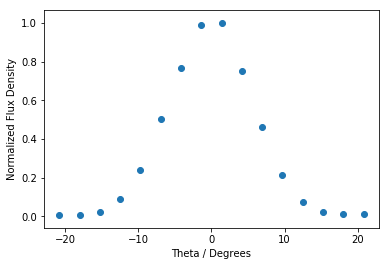

In [7]:
plt.ylabel(r'Normalized Flux Density')
plt.xlabel(r'Theta / Degrees')
plt.scatter(theta,norm_flux)

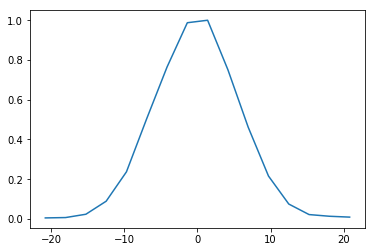

In [8]:
plt.plot(theta,norm_flux)